## ADomics: Classifiers

Goal: Feature engineering and sc-RNAseq performance on classifiers in scikit-learn



In [18]:
# This code needs to exist in every notebook that imports functions from another file so that it will automatically check for changes in that file and update cached versions. 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
#Import data and process to generate PCA components

from data import scDATA
from tools import scPLOT

# Specify the data path and figs directory, if saving
matrix_dir = r'C:\Users\Sarah\Dropbox\Sharejerah\ROSMAP\data'  
figure_directory= r'C:\Users\Sarah\Dropbox\Bearah Bace\PythonProjects\ad-omics\OtherExports\FIGURES'

ad_data = scDATA(matrix_dir,verbose=True,debug=False) # for print output
ad_plot = scPLOT(ad_data) #no save path for figures
ad_plot.run_pipeline()


Matrix shape: (15055, 22514)
Number of genes in file: 15055
Number of cells in file: 22514
Successfully assigned gene and cell names after transpose!
Final data shape: (22514, 15055)
Sample of var_names: ['SAMD11', 'NOC2L', 'KLHL17', 'HES4', 'ISG15']
Sample of obs_names: ['SM_171013Tsa.CTACCCAGTGCAACGA-3', 'SM_171013Tsa.AACTTTCTCTGCAGTA-7', 'SM_171013Tsa.AGATTGCGTGCAGTAG-7', 'SM_171013Tsa.CGCGGTACACGCATCG-13', 'SM_171013Tsa.CTCTAATAGAAACCAT-15']
Original metadata shape: (22514, 16)
Final Metadata shape:
(22514, 16)
Index(['subject', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'id',
       'library_id', 'batch', 'brain_region', 'age_death', 'msex', 'pmi',
       'ADdiag2types', 'percent.mt', 'percent.rp', 'celltype', 'cellsubtype'],
      dtype='object')
                                       subject orig.ident  nCount_RNA  \
rownames                                                                
SM_171013Tsa.CTACCCAGTGCAACGA-3   ROSMAP-66835   vascular      1379.0   
SM_171013Tsa.AACT

2025-05-23 15:14:20,108 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...


Filtered input data shape: (22514, 2000)


2025-05-23 15:14:23,770 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-05-23 15:14:23,893 - harmonypy - INFO - Iteration 1 of 20
2025-05-23 15:14:32,861 - harmonypy - INFO - Iteration 2 of 20
2025-05-23 15:14:41,546 - harmonypy - INFO - Iteration 3 of 20
2025-05-23 15:14:50,231 - harmonypy - INFO - Converged after 3 iterations
c:\Users\Sarah\.conda\envs\datasci\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Z_corr shape: (30, 22514)
Expected shape: 22514 x 30
Harmony batch correction complete for full dataset.
Harmony embeddings stored in adata_hvg.obsm['X_pca_harmony'].
Running UMAP...
Using Harmony-corrected PCA for UMAP
UMAP completed successfully for the full dataset.
Running UMAP...
Error: 'train' subset not found. Run PCA with use_split=True first.
Run: self.run_pca(use_split=True, split_subset='train')
Run pipeline complete.


Adding these unassigned subjects to the training set.
Running PCA...
Adding these unassigned subjects to the training set.
Running PCA on training subset with 13809 cells.
Corresponding metadata shape: (13809, 17)
PCA results stored in self.adata_hvg_train
Metadata stored in self.metadata_train
PCA completed successfully. Computed 30 principal components.
Variance explained by first 5 PCs: 20.28%
Variance explained by all PCs: 31.20%
Running PCA...
Adding these unassigned subjects to the training set.
Running PCA on test subset with 3217 cells.
Corresponding metadata shape: (3217, 17)
PCA results stored in self.adata_hvg_test
Metadata stored in self.metadata_test
PCA completed successfully. Computed 30 principal components.
Variance explained by first 5 PCs: 17.99%
Variance explained by all PCs: 30.51%
Running PCA...
Adding these unassigned subjects to the training set.
Running PCA on validation subset with 5488 cells.
Corresponding metadata shape: (5488, 17)


2025-05-22 15:29:37,355 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...


PCA results stored in self.adata_hvg_val
Metadata stored in self.metadata_val
PCA completed successfully. Computed 30 principal components.
Variance explained by first 5 PCs: 26.34%
Variance explained by all PCs: 36.64%
Running Harmony batch correction on train subset using 'batch'...
Input data shape: (13809, 2000)
Input data obs index length: 13809
PCA matrix shape: (13809, 30)
Metadata shape: (22514, 17)
Sample of input data obs index: ['SM_171013Tsa.CTACCCAGTGCAACGA-3', 'SM_171013Tsa.CGCGGTACACGCATCG-13', 'SM_171013Tsa.CTCTAATAGAAACCAT-15', 'SM_171013Tsa.CATCGAACAAACTGCT-20', 'SM_171013Tsa.GTACTCCGTACGCTGC-36']
Sample of metadata index: ['SM_171013Tsa.CTACCCAGTGCAACGA-3', 'SM_171013Tsa.AACTTTCTCTGCAGTA-7', 'SM_171013Tsa.AGATTGCGTGCAGTAG-7', 'SM_171013Tsa.CGCGGTACACGCATCG-13', 'SM_171013Tsa.CTCTAATAGAAACCAT-15']
Number of overlapping indices: 13809
Filtered metadata shape: (13809, 17)
Filtered input data shape: (13809, 2000)


2025-05-22 15:29:40,023 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-05-22 15:29:40,103 - harmonypy - INFO - Iteration 1 of 20
2025-05-22 15:29:45,973 - harmonypy - INFO - Iteration 2 of 20
2025-05-22 15:29:53,340 - harmonypy - INFO - Iteration 3 of 20
2025-05-22 15:29:58,985 - harmonypy - INFO - Iteration 4 of 20
2025-05-22 15:30:03,968 - harmonypy - INFO - Iteration 5 of 20
2025-05-22 15:30:09,586 - harmonypy - INFO - Converged after 5 iterations
2025-05-22 15:30:09,635 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...


Z_corr shape: (30, 13809)
Expected shape: 13809 x 30
Harmony batch correction complete for train subset.
Harmony embeddings stored in adata_hvg_train.obsm['X_pca_harmony'].
Running Harmony batch correction on test subset using 'batch'...
Input data shape: (3217, 2000)
Input data obs index length: 3217
PCA matrix shape: (3217, 30)
Metadata shape: (22514, 17)
Sample of input data obs index: ['SM_171013Tsa.AACTTTCTCTGCAGTA-7', 'SM_171013Tsa.AGATTGCGTGCAGTAG-7', 'SM_171013Tsa.GCGCAGTAGGTGCTTT-17', 'SM_171013Tsa.AAGGAGCCACACGCTG-32', 'SM_171013Tsa.TAGTGGTAGAATGTTG-48']
Sample of metadata index: ['SM_171013Tsa.CTACCCAGTGCAACGA-3', 'SM_171013Tsa.AACTTTCTCTGCAGTA-7', 'SM_171013Tsa.AGATTGCGTGCAGTAG-7', 'SM_171013Tsa.CGCGGTACACGCATCG-13', 'SM_171013Tsa.CTCTAATAGAAACCAT-15']
Number of overlapping indices: 3217
Filtered metadata shape: (3217, 17)
Filtered input data shape: (3217, 2000)


2025-05-22 15:30:10,352 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-05-22 15:30:10,372 - harmonypy - INFO - Iteration 1 of 20
2025-05-22 15:30:11,236 - harmonypy - INFO - Iteration 2 of 20
2025-05-22 15:30:12,104 - harmonypy - INFO - Iteration 3 of 20
2025-05-22 15:30:12,970 - harmonypy - INFO - Iteration 4 of 20
2025-05-22 15:30:13,688 - harmonypy - INFO - Iteration 5 of 20
2025-05-22 15:30:14,335 - harmonypy - INFO - Iteration 6 of 20
2025-05-22 15:30:14,845 - harmonypy - INFO - Iteration 7 of 20
2025-05-22 15:30:15,728 - harmonypy - INFO - Converged after 7 iterations
2025-05-22 15:30:15,774 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...


Z_corr shape: (30, 3217)
Expected shape: 3217 x 30
Harmony batch correction complete for test subset.
Harmony embeddings stored in adata_hvg_test.obsm['X_pca_harmony'].
Running Harmony batch correction on val subset using 'batch'...
Input data shape: (5488, 2000)
Input data obs index length: 5488
PCA matrix shape: (5488, 30)
Metadata shape: (22514, 17)
Sample of input data obs index: ['SM_171013Tsa.AGGCCGTAGTTGTAGA-22', 'SM_171013Tsa.CACCAGGAGAGGGATA-22', 'SM_171013Tsa.CTGCCTAAGCGTGTCC-22', 'SM_171013Tsa.GCATACATCGTCACGG-22', 'SM_171013Tsa.GTCAAGTTCTGGTTCC-22']
Sample of metadata index: ['SM_171013Tsa.CTACCCAGTGCAACGA-3', 'SM_171013Tsa.AACTTTCTCTGCAGTA-7', 'SM_171013Tsa.AGATTGCGTGCAGTAG-7', 'SM_171013Tsa.CGCGGTACACGCATCG-13', 'SM_171013Tsa.CTCTAATAGAAACCAT-15']
Number of overlapping indices: 5488
Filtered metadata shape: (5488, 17)
Filtered input data shape: (5488, 2000)


2025-05-22 15:30:16,838 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-05-22 15:30:16,872 - harmonypy - INFO - Iteration 1 of 20
2025-05-22 15:30:18,825 - harmonypy - INFO - Iteration 2 of 20
2025-05-22 15:30:20,846 - harmonypy - INFO - Iteration 3 of 20
2025-05-22 15:30:22,792 - harmonypy - INFO - Iteration 4 of 20
2025-05-22 15:30:24,470 - harmonypy - INFO - Iteration 5 of 20
2025-05-22 15:30:26,179 - harmonypy - INFO - Converged after 5 iterations
c:\Users\Sarah\.conda\envs\datasci\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Z_corr shape: (30, 5488)
Expected shape: 5488 x 30
Harmony batch correction complete for val subset.
Harmony embeddings stored in adata_hvg_val.obsm['X_pca_harmony'].
Running UMAP...
Using Harmony-corrected PCA for UMAP
Fitting UMAP on training data...
Transforming test data using trained UMAP model...
Transforming val data using trained UMAP model...
UMAP completed successfully for all subsets.


Combined shape: (22514, 3)
       UMAP1     UMAP2 traintestsplit
0  11.929284  3.734224          train
1   9.626765  4.553055          train
2  10.490157  3.990035          train
3   4.340373  5.954580          train
4   2.999389  8.444477          train
          UMAP1     UMAP2 traintestsplit
22509  0.133845  3.246103            val
22510  8.960414  4.377662            val
22511  2.620824  8.179123            val
22512 -3.081114  3.145317            val
22513  2.303594  8.290069            val


Initializing classifier: Nearest Neighbors
Initializing classifier: Linear SVM
Initializing classifier: RBF SVM
Initializing classifier: Decision Tree
Initializing classifier: Random Forest
Initializing classifier: Neural Net
Initializing classifier: AdaBoost


c:\Users\Sarah\.conda\envs\datasci\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Initializing classifier: Naive Bayes
Initializing classifier: QDA
Run ML pipeline complete.


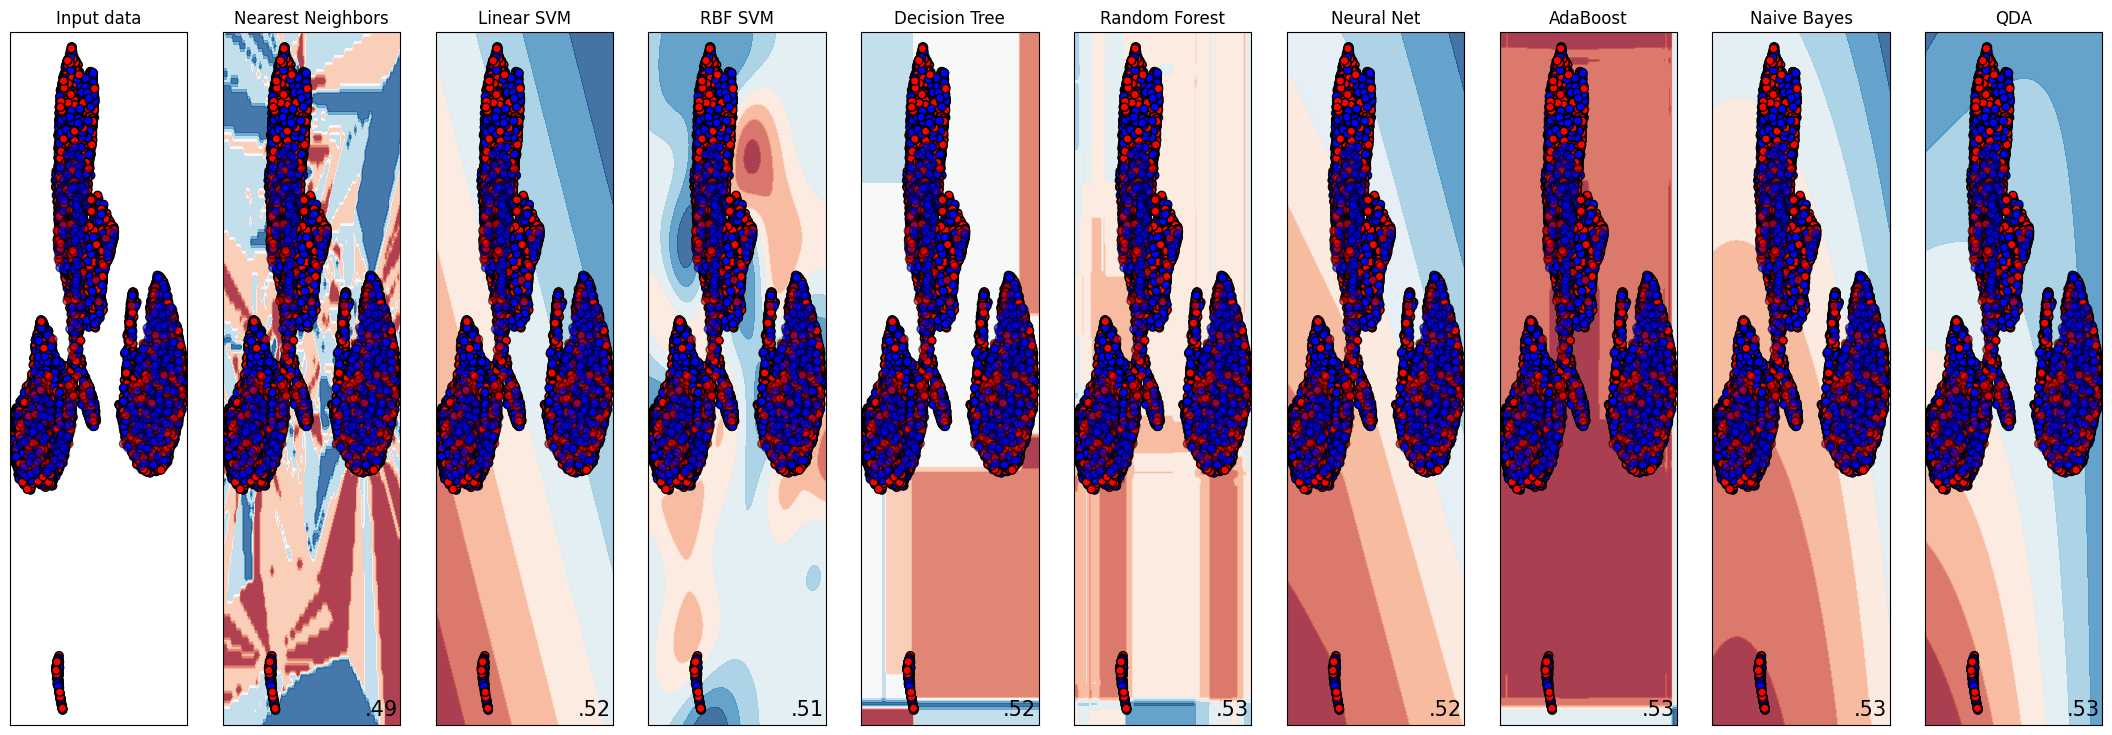

In [ ]:
# Run complete ML pipeline up to classifier performance

ad_plot.run_ML_pipeline(plot_figs=False,compute_classifiers=False)

In [160]:
#Troubleshooting new classifier methodology, one step at a time

#Overall function: run_classifier_pipeline
# limit_dg = True

#ad_plot.sc_data._add_classifier_features(limit_dg=limit_dg)
#train_mask, val_mask, test_mask = ad_plot.sc_data.split_patient_level()
#x_train, x_val, x_test, y_train, y_val, y_test = ad_plot.sc_data._generate_subsets_for_classifier(
#    limit_dg=limit_dg, train_mask=train_mask, val_mask=val_mask, test_mask=test_mask)
checkpoint_file=r'C:\Users\Sarah\Dropbox\Bearah Bace\PythonProjects\ad-omics\results\model_checkpoint.pkl'  # Windows
ad_plot.sc_data._model_comparison(x_train, x_val, x_test,y_train, y_val, y_test, 
                                  include_dnn=False, cv_folds=5,checkpoint_file=checkpoint_file)

#x_train = 13809
#x_val = 3217
#x_test = 5488


Training set, X: (13809, 113)
Training set, y: (13809,)
Validation set, X: (5488, 113)
Validation set, y: (5488,)
Test set, X: (3217, 113)
Test set, y: (3217,)
Loaded checkpoint with 6 completed models: ['logistic', 'svm', 'decision_tree', 'random_forest', 'adaboost', 'xgboost']
Skipping logistic - already completed
Skipping svm - already completed
Skipping decision_tree - already completed
Skipping random_forest - already completed
Skipping adaboost - already completed
Skipping xgboost - already completed

MODEL COMPARISON SUMMARY
               CV_Score  Val_Accuracy   Val_AUC  Training_Time
random_forest  0.636613      0.548105  0.602681     326.518742
adaboost       0.616988      0.550656  0.600468     292.881570
logistic       0.607068      0.538994  0.597369      89.841181
xgboost        0.605881      0.544825  0.583471      20.593304
decision_tree  0.576654      0.552478  0.549012     370.670881
svm            0.602694      0.556305       NaN     688.718322

Overall best model: 

({'logistic': {'best_model': LogisticRegression(C=0.1, max_iter=1000, penalty='l1', random_state=42,
                      solver='liblinear'),
   'best_params': {'C': 0.1,
    'max_iter': 1000,
    'penalty': 'l1',
    'solver': 'liblinear'},
   'cv_score': np.float64(0.6070675365813424),
   'val_accuracy': 0.5389941690962099,
   'val_auc': np.float64(0.5973694047285301),
   'training_time': 89.8411808013916,
   'grid_search': GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                error_score=-inf,
                estimator=LogisticRegression(max_iter=1000, random_state=42),
                n_jobs=-1,
                param_grid=[{'C': [0.01, 0.05, 0.1, 0.2, 0.5], 'max_iter': [1000],
                             'penalty': ['l1'], 'solver': ['liblinear']},
                            {'C': [0.1, 1.0, 10.0], 'max_iter': [1000],
                             'penalty': ['l2'], 'solver': ['liblinear', 'saga']},
                            {'C': [0.1, 1.

In [166]:
#Visualize output of any of the winning models
ad_plot.sc_data._final_test_evaluation(x_test, y_test, model_name='random_forest')

{'model_name': 'random_forest',
 'best_parameters': {'max_depth': None,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 10,
  'n_estimators': 200},
 'test_accuracy': 0.5815977618899596,
 'test_auc': np.float64(0.621506350753995),
 'f1_score': np.float64(0.5808375732794337),
 'predictions': array([0, 1, 0, ..., 1, 1, 0], shape=(3217,)),
 'probabilities': array([0.41270454, 0.53528137, 0.49420338, ..., 0.50664498, 0.52089267,
        0.48898525], shape=(3217,))}

In [165]:
# Plot comparison of the models' outputs
# ad_plot.sc_data.verbose=False #suppress print output from here for plotting
ad_plot.compare_best_models(x_test, y_test)

